# Heart Disease Classification

In [2]:
# munging imports
import pandas as pd
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# modeling imports 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV,
                                     StratifiedKFold)
from sklearn.metrics import (precision_score, recall_score, 
                             accuracy_score, confusion_matrix, f1_score, fbeta_score, 
                             brier_score_loss, make_scorer, roc_curve, roc_auc_score, 
                             precision_recall_curve, auc)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import imblearn.over_sampling

In [3]:
# import dataset
df = pd.read_csv('heart_disease_2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
# Stats for positive cases and features
pos_df = df[df['HeartDiseaseorAttack']==1]
pos_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,23893.0,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,...,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000
mean,1.0,0.750345,0.701168,0.988658,29.466622,0.619470,0.164776,0.687231,0.640355,0.604696,...,0.963588,0.110869,3.367555,4.670322,9.154439,0.414975,0.572887,10.131210,4.745951,5.148161
std,0.0,0.432822,0.457756,0.105896,6.740591,0.485527,0.370986,0.935105,0.479906,0.488926,...,0.187318,0.313977,1.084882,9.192712,11.873898,0.492728,0.494669,2.218853,1.061990,2.198956
min,1.0,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,1.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,3.000000
50%,1.0,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,10.000000,5.000000,5.000000
75%,1.0,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,4.000000,20.000000,1.000000,1.000000,12.000000,6.000000,7.000000
max,1.0,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# Stats for negative cases and features
neg_df = df[df['HeartDiseaseorAttack']==0]
neg_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229787.0,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,...,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000,229787.000000
mean,0.0,0.395588,0.395314,0.959967,28.269624,0.424837,0.027656,0.256337,0.768625,0.637329,...,0.949749,0.081401,2.422369,3.030306,3.731299,0.142567,0.426560,7.813858,5.082093,6.148050
std,0.0,0.488978,0.488919,0.196036,6.584604,0.494319,0.163986,0.655518,0.421713,0.480772,...,0.218463,0.273451,1.026563,7.184995,8.153279,0.349631,0.494578,3.046394,0.972052,2.034395
min,0.0,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.0,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.0,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.0,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,0.0,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


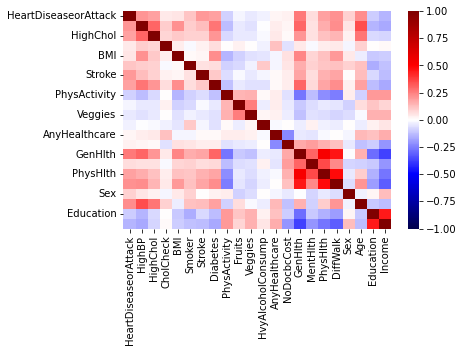

In [9]:
# correlation df
corr_df = df.corr()

# Correlation heatmap
sns.heatmap(corr_df, cmap='seismic', vmin=-1, vmax=1);

In [10]:
# view correlations with target
corr_df['HeartDiseaseorAttack'].abs().sort_values(ascending=False)

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Income                  0.141011
Smoker                  0.114441
Education               0.099600
PhysActivity            0.087299
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
Veggies                 0.039167
NoDocbcCost             0.031000
HvyAlcoholConsump       0.028991
Fruits                  0.019790
AnyHealthcare           0.018734
Name: HeartDiseaseorAttack, dtype: float64

### Distribution of Target Variables

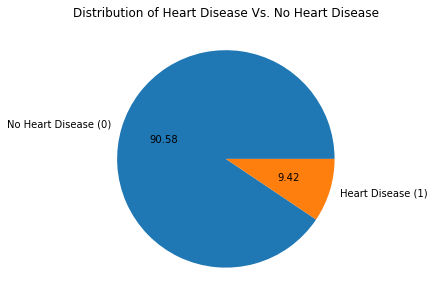

In [11]:
# Create pie chart of the distribution of HD vs. No HD

labels = 'No Heart Disease (0)', 'Heart Disease (1)'

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Distribution of Heart Disease Vs. No Heart Disease")
df['HeartDiseaseorAttack'].value_counts().plot.pie(autopct='%.2f', labels=labels, legend=False, ax=ax)

ax.set_ylabel(None)
plt.show();

In [12]:
df['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

## Train - Test - Split
60/20/20 - Train/Validation/Test

In [13]:
# Split data into training, validation, testing sets
X, y = df.drop('HeartDiseaseorAttack', axis=1), df['HeartDiseaseorAttack']
X, X_test, y, y_test = train_test_split(X,
                                        y,
                                        stratify=y,
                                        test_size=.2,
                                        random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  stratify=y,
                                                  test_size=.25,
                                                  random_state=21)

## Functions

### Scoring Function

In [14]:
def get_scores(model, test_X, test_y, threshold=0.5):
    # function to score model
    
    # Probability >= 0.5
    probs = model.predict_proba(test_X)[:, 1] >= threshold
    
    model_acc = accuracy_score(test_y, probs)
    model_recall = recall_score(test_y, probs)
    model_precision = precision_score(test_y, probs)
    model_f2 = fbeta_score(test_y, probs, beta=2)
    model_brier = brier_score_loss(test_y, 1-probs, pos_label=1)
    
    # report scores
    print('Simple Logistic Regression Accuracy Score: %.3f' % (model_acc))
    print('Simple Logistic Regression Recall Score: %.3f' % (model_recall))
    print('Simple Logistic Regression Precision Score: %.3f' % (model_precision))
    print('Simple Logistic Regression F2 Score: %.3f' % (model_f2))
    print('Simple Logistic Regression Brier Score: %.3f' % (model_brier))

### Confusion Matrix Function

In [15]:
def make_cm(model, X_val, y_val, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is 
    # above threshold
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    cm = confusion_matrix(y_val, y_predict)
    
    # Labels to be used on cm
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in 
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in 
                         cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in 
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    # Plotting cm
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Prediction');
    ax.set_ylabel('Actual'); 
    ax.xaxis.set_ticklabels(['0', '1']); 
    ax.yaxis.set_ticklabels(['0', '1']);

### Optimal Threshold Function

In [16]:
def get_threshold(model, test_X, test_y):

    thresh_ps = np.linspace(.05,.90,100)

    f1_scores, prec_scores, rec_scores, acc_scores, f2_scores = [], [], [], [], [] 

    for p in thresh_ps:
        lr_model_labels = model.predict_proba(X_val)[:,1] >= p
        f1_scores.append(f1_score(y_val, lr_model_labels))
        prec_scores.append(precision_score(y_val, lr_model_labels))
        rec_scores.append(recall_score(y_val, lr_model_labels))
        acc_scores.append(accuracy_score(y_val, lr_model_labels))
        f2_scores.append(fbeta_score(y_val, lr_model_labels, beta=2))
    
    plt.plot(thresh_ps, f1_scores)
    plt.plot(thresh_ps, prec_scores)
    plt.plot(thresh_ps, rec_scores)
    plt.plot(thresh_ps, acc_scores)
    plt.plot(thresh_ps, f2_scores)

    plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
    plt.legend(['F1', 'Precision', 'Recall', 'Accuracy', 'F2'],loc ='lower right')
    plt.xlabel('P threshold')
    plt.ylabel('Metric score')

    best_f2_score = np.max(f2_scores)
    best_thresh_p = thresh_ps[np.argmax(f2_scores)]

    print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
          % (best_f2_score, best_thresh_p))

### ROC Curve Function

In [17]:
def get_roc(model, test_X, test_y):
    # function to plot ROC and get AUC
    
    # predict probabilities
    model_probs = model.predict_proba(test_X)[:, 1]
    
    # generate no skill prediction
    ns_probs = [0 for _ in range(len(test_y))]
    
    # calculate AUC scores
    ns_auc = roc_auc_score(test_y, ns_probs)
    model_auc = roc_auc_score(test_y, model_probs)
    
    # report scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (model_auc))
    
    # Calculate the ROC curves
    ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(test_y, model_probs)

    # Plot the ROC Curves
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

### Precision-Recall Curve

In [18]:
def get_prc(model, test_X, test_y):
    # Function to get the precision-recall curve
    
    # predict probabilities
    model_probs = model.predict_proba(test_X)[:, 1]
    
    # predict class values
    yhat = model.predict(test_X)
    model_prec, model_rec, _ = precision_recall_curve(test_y, model_probs)
    model_auc = auc(model_rec, model_prec)
    
    # report scores
    print('Logistic: AUC=%.3f' % (model_auc))
    
    # plot the prc
    no_skill = len(test_y[test_y==1]) / len(test_y)
    plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(model_rec, model_prec, marker='.', label='Logistic')
    
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

### Preprocessor - Column Transformer

In [19]:
# Continuous Variables
numeric_features = ['MentHlth', 'PhysHlth', 'BMI']
numeric_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy="median")), 
           ('scaler', StandardScaler())])

# Categorical Variables
categorical_features = ['Age', 'Education', 'Income', 
                        'GenHlth', 'Diabetes']

# instantiate encoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Models

### Simple Univariate Logistic Regression

In [20]:
# instantiate model
lm1 = LogisticRegression(C=1000, solver='liblinear')

# fit model
lm1.fit(X_train[['Smoker']], y_train)

LogisticRegression(C=1000, solver='liblinear')

In [21]:
# score model
get_scores(lm1, X_val[['Smoker']], y_val)

Simple Logistic Regression Accuracy Score: 0.906
Simple Logistic Regression Recall Score: 0.000
Simple Logistic Regression Precision Score: 0.000
Simple Logistic Regression F2 Score: 0.000
Simple Logistic Regression Brier Score: 0.906


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


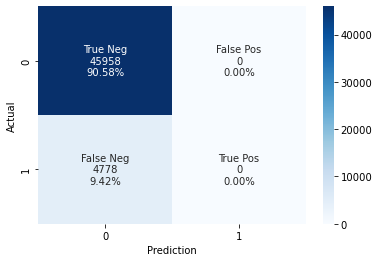

In [22]:
# confusion matrix
make_cm(lm1, X_val[['Smoker']], y_val)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.605


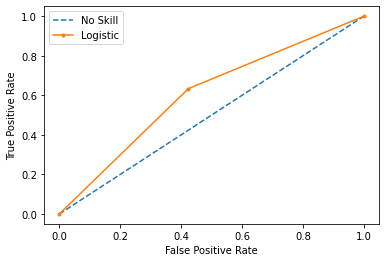

In [23]:
# ROC Curve & AUC scores
get_roc(lm1, X_val[['Smoker']], y_val)

Logistic: AUC=0.401


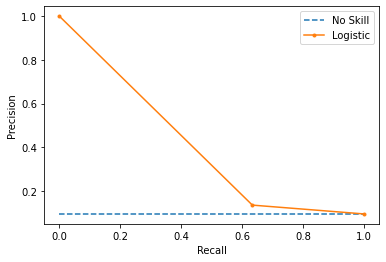

In [24]:
# PRC & AUC scores
get_prc(lm1, X_val[['Smoker']], y_val)

### Simple Logistic Regression w/ Scaled Data

In [25]:
# instantiate model with column transformer
lm2 = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('classifier', LogisticRegression(solver='liblinear'))])

In [26]:
# fit training data
lm2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MentHlth', 'PhysHlth',
                                                   'BMI']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Education', 'Income',
                                                   'GenHlth', 'Diabetes'])])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [27]:
# evaluate validation set
get_scores(lm2, X_val, y_val)

Simple Logistic Regression Accuracy Score: 0.905
Simple Logistic Regression Recall Score: 0.045
Simple Logistic Regression Precision Score: 0.474
Simple Logistic Regression F2 Score: 0.055
Simple Logistic Regression Brier Score: 0.905


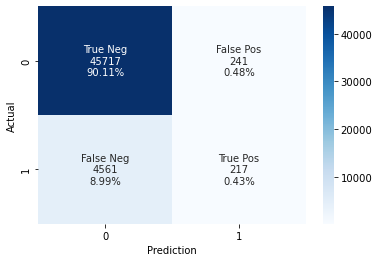

In [28]:
# confusion matrix for validation set
make_cm(lm2, X_val, y_val)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision 

Logistic Regression Model best F2 score 0.505 at prob decision threshold >= 0.110


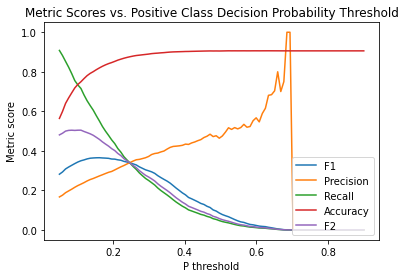

In [29]:
# determine best threshold
get_threshold(lm2, X_val, y_val)

In [30]:
get_scores(lm2, X_val, y_val, threshold=.110)

Simple Logistic Regression Accuracy Score: 0.749
Simple Logistic Regression Recall Score: 0.716
Simple Logistic Regression Precision Score: 0.231
Simple Logistic Regression F2 Score: 0.505
Simple Logistic Regression Brier Score: 0.749


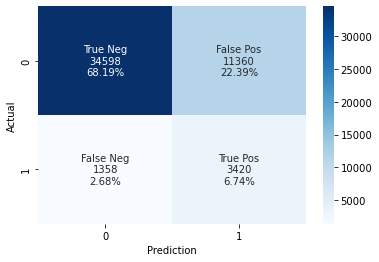

In [31]:
make_cm(lm2, X_val, y_val, threshold=.110)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.811


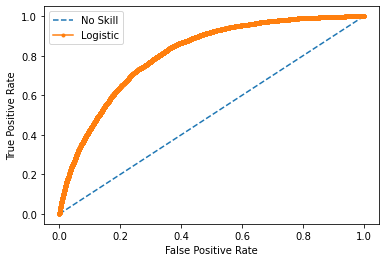

In [32]:
# ROC curve
get_roc(lm2, X_val, y_val)

Logistic: AUC=0.300


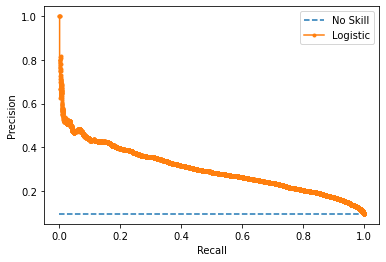

In [33]:
# precision recall curve
get_prc(lm2, X_val, y_val)

## Optimize Hyperparameters

### Regularization - C
{'classifier__C': 10}

In [34]:
# Set up parameters for GridSearch
param_grid = {'classifier__C': [0.1, 1.0, 10, 100]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
f2_scorer = make_scorer(fbeta_score, beta=2)

lm3 = Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(solver='liblinear'))])

grid_search = GridSearchCV(lm3, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer)

In [35]:
grid_search.fit(X, y)
print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 10}


### Class Weights
{'classifier__class_weight': {0: 0.09, 1: 0.91}}

In [37]:
# instantiate model
lm4 = Pipeline(
    steps=[('preprocessor', preprocessor), 
           ('classifier', LogisticRegression(C=10, solver='liblinear'))])

# Set up parameters for GridSearch
weights = np.linspace(0.0, 0.99, 100)
param_grid = {'classifier__class_weight': 
              [{0:x, 1:1.0-x} for x in weights]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
f2_scorer = make_scorer(fbeta_score, beta=2)

# GridSearch
lm4_grid_search = GridSearchCV(lm3, param_grid, cv=cv, n_jobs=-1, 
                           scoring=f2_scorer)

In [38]:
# fit data on gridsearch
lm4_grid_search.fit(X, y)

# print results
print("Best params:")
print(lm4_grid_search.best_params_)

Best params:
{'classifier__class_weight': {0: 0.09, 1: 0.91}}


### Logistic Regression w/ Optimized Hyperparameters
- {'classifier__class_weight': {0: 0.09, 1: 0.91}}
- {'classifier__C': 10}

In [39]:
# instantiate logistic regression model with scaled data, class weights, and regularization
lm5 = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('classifier', LogisticRegression(class_weight={0: 0.08457286432160804, 1: 0.915427135678392}, 
                                                        C=10, solver='liblinear'))])

In [40]:
# fit validation set
lm5.fit(X_val, y_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MentHlth', 'PhysHlth',
                                                   'BMI']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Education', 'Income',
                                                   'GenHlth', 'Diabetes'])])),
                ('classifier',
                 LogisticRegression(C=10,
                                    class_weight={

In [41]:
# validation set scores
get_scores(lm5, X_val, y_val)

Simple Logistic Regression Accuracy Score: 0.694
Simple Logistic Regression Recall Score: 0.794
Simple Logistic Regression Precision Score: 0.207
Simple Logistic Regression F2 Score: 0.506
Simple Logistic Regression Brier Score: 0.694


Logistic Regression Model best F2 score 0.507 at prob decision threshold >= 0.514


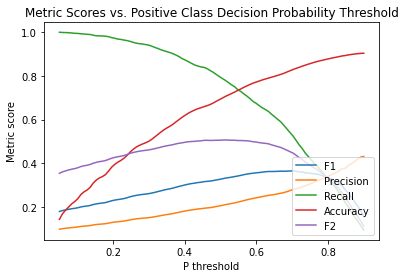

In [42]:
# optimal threshold 
get_threshold(lm5, X_val, y_val)

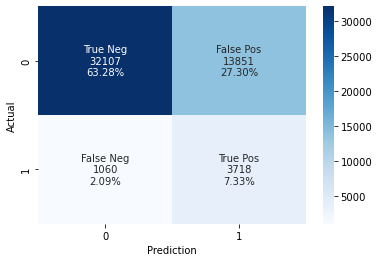

In [43]:
# confusion matrix validation set
make_cm(lm5, X_val, y_val, 0.514)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.812


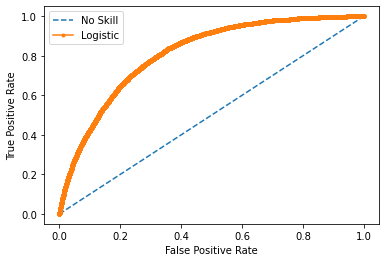

In [44]:
# ROC curve
get_roc(lm5, X_val, y_val)

Logistic: AUC=0.297


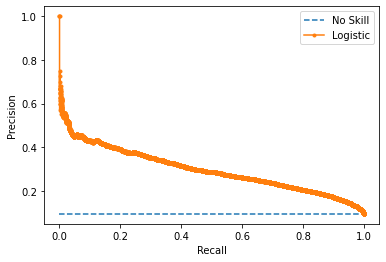

In [45]:
# get prc
get_prc(lm5, X_val, y_val)

## Final Model
### Logistic Regression w/ scaling, class weights, & regularization fit on train & validation sets

In [46]:
# instantiate model
lm5_2 = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('classifier', LogisticRegression(class_weight={0: 0.08457286432160804, 1: 0.915427135678392}, 
                                                        C=10, solver='liblinear'))])

In [47]:
# fit data on full training and validation set
lm5_2.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MentHlth', 'PhysHlth',
                                                   'BMI']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Education', 'Income',
                                                   'GenHlth', 'Diabetes'])])),
                ('classifier',
                 LogisticRegression(C=10,
                                    class_weight={

In [48]:
# score data on test (hold out) set
get_scores(lm5_2, X_test, y_test)

Simple Logistic Regression Accuracy Score: 0.700
Simple Logistic Regression Recall Score: 0.792
Simple Logistic Regression Precision Score: 0.210
Simple Logistic Regression F2 Score: 0.510
Simple Logistic Regression Brier Score: 0.700


Logistic Regression Model best F2 score 0.506 at prob decision threshold >= 0.496


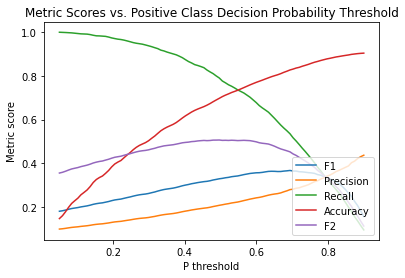

In [131]:
get_threshold(lm5_2, X_test, y_test)

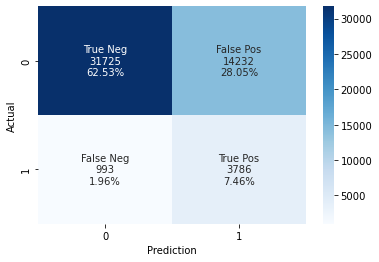

In [132]:
# confusion matrix at threshold p>=0.5
make_cm(lm5_2, X_test, y_test)

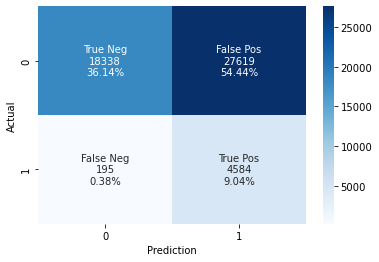

In [217]:
# confusion matrix at threshold p>=0.25
make_cm(lm5_2, X_test, y_test, 0.25)

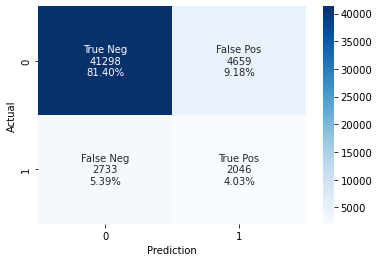

In [218]:
# confusion matrix at threshold p>=0.75
make_cm(lm5_2, X_test, y_test, 0.75)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.8


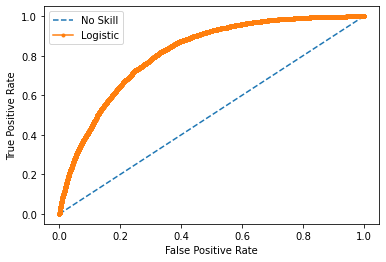

In [133]:
# ROC curve
get_roc(lm5_2, X_test, y_test)

Logistic: AUC=0.300


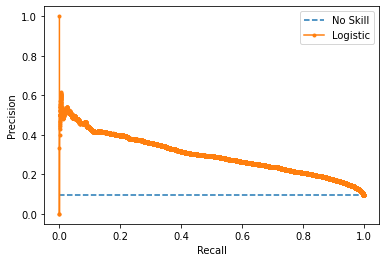

In [134]:
# PRC
get_prc(lm5_2, X_test, y_test)

## Models for comparison, not used in final model

## Oversampling

In [70]:
# Scale data
X_train_sc = preprocessor.fit_transform(X_train)
X_val_sc = preprocessor.transform(X_val)
X_test_sc = preprocessor.transform(X_test)

In [193]:
sc_X = preprocessor.fit_transform(X)
sc_X_test = preprocessor.transform(X_test)

In [195]:
ROS = imblearn.over_sampling.RandomOverSampler(random_state=21)
X_tr_os, y_tr_os = ROS.fit_resample(sc_X, y)

In [196]:
lm6 = LogisticRegression(solver='liblinear', C=10)
lm6.fit(X_tr_os, y_tr_os)

LogisticRegression(C=10, solver='liblinear')

In [189]:
get_scores(lm6, X_val_sc, y_val)

Simple Logistic Regression Accuracy Score: 0.725
Simple Logistic Regression Recall Score: 0.750
Simple Logistic Regression Precision Score: 0.219
Simple Logistic Regression F2 Score: 0.505
Simple Logistic Regression Brier Score: 0.725


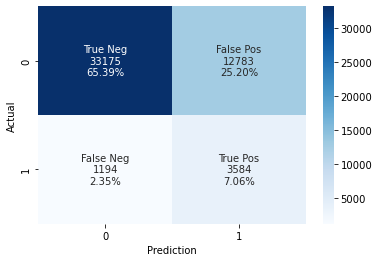

In [158]:
make_cm(lm6, X_val_sc, y_val)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.8


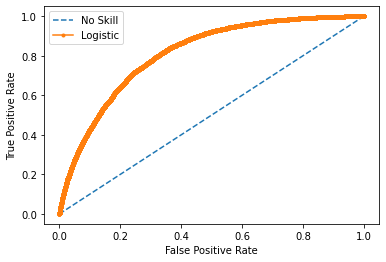

In [159]:
get_roc(lm6, X_val_sc, y_val)

Logistic: AUC=0.298


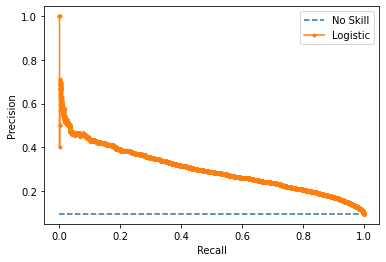

In [160]:
get_prc(lm6, X_val_sc, y_val)

In [197]:
get_scores(lm6, sc_X_test, y_test)

Simple Logistic Regression Accuracy Score: 0.722
Simple Logistic Regression Recall Score: 0.758
Simple Logistic Regression Precision Score: 0.219
Simple Logistic Regression F2 Score: 0.508
Simple Logistic Regression Brier Score: 0.722


### SMOTE Oversampling

In [148]:
smote = imblearn.over_sampling.SMOTE(random_state = 21)
X_tr_smote, y_tr_smote = smote.fit_resample(X_train_sc, y_train)    

In [146]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, 
                                     random_state = 21)
X_tr_smote, y_tr_smote = smote.fit_resample(X_train_sc, y_train)    

In [149]:
lm7 = LogisticRegression(solver='liblinear', C=10)
lm7.fit(X_tr_smote, y_tr_smote)

LogisticRegression(C=10, solver='liblinear')

In [191]:
get_scores(lm7, X_val_sc, y_val)

Simple Logistic Regression Accuracy Score: 0.725
Simple Logistic Regression Recall Score: 0.748
Simple Logistic Regression Precision Score: 0.219
Simple Logistic Regression F2 Score: 0.505
Simple Logistic Regression Brier Score: 0.725


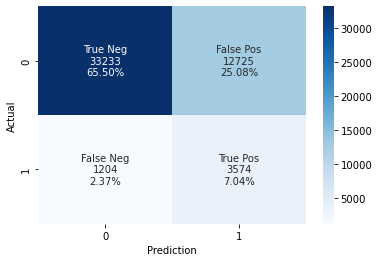

In [151]:
make_cm(lm7, X_val_sc, y_val)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.8


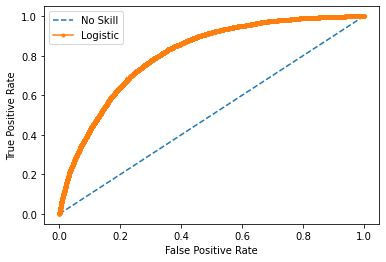

In [152]:
get_roc(lm7, X_val_sc, y_val)

Logistic: AUC=0.299


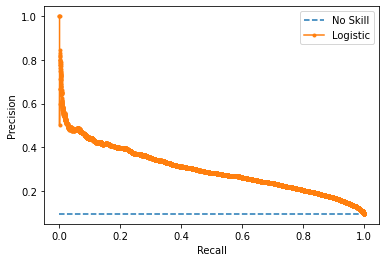

In [153]:
get_prc(lm7, X_val_sc, y_val)

In [192]:
get_scores(lm7, X_test_sc, y_test)

Simple Logistic Regression Accuracy Score: 0.726
Simple Logistic Regression Recall Score: 0.750
Simple Logistic Regression Precision Score: 0.220
Simple Logistic Regression F2 Score: 0.506
Simple Logistic Regression Brier Score: 0.726


## Undersampling

In [141]:
import imblearn.under_sampling

In [164]:
RUS = imblearn.under_sampling.RandomUnderSampler(random_state=21)
X_tr_us, y_tr_us = RUS.fit_resample(X_train_sc, y_train)

In [176]:
X_tr_us.shape

(28672, 38)

In [166]:
lm8 = LogisticRegression(solver='liblinear', C=10)
lm8.fit(X_tr_us, y_tr_us)

LogisticRegression(C=10, solver='liblinear')

In [169]:
get_scores(lm8, X_val_sc, y_val)

Simple Logistic Regression Accuracy Score: 0.725
Simple Logistic Regression Recall Score: 0.748
Simple Logistic Regression Precision Score: 0.219
Simple Logistic Regression F2 Score: 0.505
Simple Logistic Regression Brier Score: 0.725


In [170]:
get_scores(lm8, X_test_sc, y_test)

Simple Logistic Regression Accuracy Score: 0.725
Simple Logistic Regression Recall Score: 0.755
Simple Logistic Regression Precision Score: 0.220
Simple Logistic Regression F2 Score: 0.508
Simple Logistic Regression Brier Score: 0.725


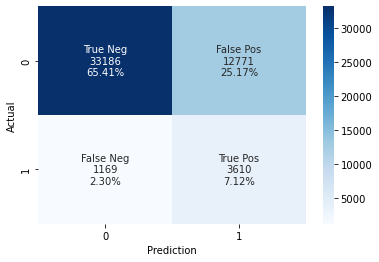

In [171]:
make_cm(lm8, X_test_sc, y_test)

## Random Forest

In [207]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_features = 3, n_jobs=-1)
rf.fit(X_train_sc, y_train)

RandomForestClassifier(max_features=3, n_jobs=-1)

In [208]:
rf_pred = rf.predict(X_val_sc)

In [209]:
accuracy_score(y_val, rf_pred)

0.8899597918637654

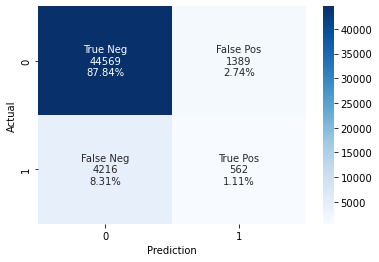

In [210]:
make_cm(rf, X_val_sc, y_val)

In [212]:
model_acc = accuracy_score(y_val, rf_pred)
model_recall = recall_score(y_val, rf_pred)
model_precision = precision_score(y_val, rf_pred)
model_f2 = fbeta_score(y_val, rf_pred, beta=2)
model_brier = brier_score_loss(y_val, 1-rf_pred, pos_label=1)
    
    # report scores
print('Simple Logistic Regression Accuracy Score: %.3f' % (model_acc))
print('Simple Logistic Regression Recall Score: %.3f' % (model_recall))
print('Simple Logistic Regression Precision Score: %.3f' % (model_precision))
print('Simple Logistic Regression F2 Score: %.3f' % (model_f2))
print('Simple Logistic Regression Brier Score: %.3f' % (model_brier))

Simple Logistic Regression Accuracy Score: 0.890
Simple Logistic Regression Recall Score: 0.115
Simple Logistic Regression Precision Score: 0.288
Simple Logistic Regression F2 Score: 0.131
Simple Logistic Regression Brier Score: 0.890


In [213]:
rf_ros = RandomForestClassifier(n_estimators = 100, 
                             max_features = 3, 
                             n_jobs=-1, 
                             class_weight = {0: 0.09, 1: 0.91})
rf_ros.fit(X_train_sc, y_train)

RandomForestClassifier(class_weight={0: 0.09, 1: 0.91}, max_features=3,
                       n_jobs=-1)

In [214]:
rf_pred = rf_ros.predict(X_val_sc)

In [215]:
model_acc = accuracy_score(y_val, rf_pred)
model_recall = recall_score(y_val, rf_pred)
model_precision = precision_score(y_val, rf_pred)
model_f2 = fbeta_score(y_val, rf_pred, beta=2)
model_brier = brier_score_loss(y_val, 1-rf_pred, pos_label=1)
    
    # report scores
print('Simple Logistic Regression Accuracy Score: %.3f' % (model_acc))
print('Simple Logistic Regression Recall Score: %.3f' % (model_recall))
print('Simple Logistic Regression Precision Score: %.3f' % (model_precision))
print('Simple Logistic Regression F2 Score: %.3f' % (model_f2))
print('Simple Logistic Regression Brier Score: %.3f' % (model_brier))

Simple Logistic Regression Accuracy Score: 0.851
Simple Logistic Regression Recall Score: 0.184
Simple Logistic Regression Precision Score: 0.194
Simple Logistic Regression F2 Score: 0.186
Simple Logistic Regression Brier Score: 0.851


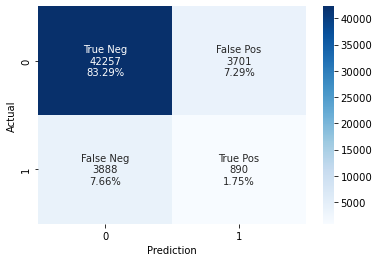

In [216]:
make_cm(rf_ros, X_val_sc, y_val)